<a href="https://colab.research.google.com/github/shreyas-sreedhar/ipl-data-analysis/blob/main/DSETM_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO6105 - ASSIGNMENT_1**

*` - Shreyas S Sreedhar 002874944`*

Dataset Link - https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020

<br/>
CSV - IPL Ball-by-Ball 2008-2020.csv
CSV 2 - IPL Matches 2008-2020.csv

**Questions to be answered:**
* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix

In [2]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=7d080940928dbb24810ceafef7da0209758cef480b84426722e1903842186a69
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [4]:
ipl_data = pd.read_csv(
    "/content/drive/MyDrive/NEU-DSETM-ASSIGNMENT/Dataset/IPL Ball-by-Ball 2008-2020.csv"
)
ipl_matches_data = pd.read_csv(
    "/content/drive/MyDrive/NEU-DSETM-ASSIGNMENT/Dataset/IPL Matches 2008-2020.csv"
)

In [5]:
# Viewing data in the file
ipl_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
# Viewing the matches data in the file
ipl_matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


### IPL Ball-by-Ball 2008-2020 Ball_by_Ball Dataset

The dataset contains detailed information about each ball bowled in IPL matches during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match.
- **inning**: The inning number (1 or 2).
- **over**: The over number in the inning.
- **ball**: The ball number within the over.
- **batsman**: The name of the batsman on strike.
- **non_striker**: The name of the non-striker batsman.
- **bowler**: The name of the bowler.
- **batsman_runs**: The number of runs scored by the batsman off the ball.
- **extra_runs**: The number of extra runs conceded (like wides, no balls).
- **total_runs**: Total runs scored off the ball (batsman_runs + extra_runs).
- **non_boundary**: Indicator if the runs were scored without a boundary.
- **is_wicket**: Indicator if a wicket was taken on the ball.
- **dismissal_kind**: The type of dismissal, if applicable.
- **player_dismissed**: The name of the dismissed player, if applicable.
- **fielder**: The name of the fielder involved in the dismissal, if applicable.
- **extras_type**: The type of extra run conceded, if applicable.
- **batting_team**: The name of the batting team.
- **bowling_team**: The name of the bowling team.

Using this dataset for various data analysis and exploration tasks related to IPL matches till 2020


### IPL Matches 2008-2020 Matches Dataset

The dataset contains information about IPL matches played during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match, same as in the ball-by-ball dataset.
- **city**: City where the match was played.
- **date**: Date of the match.
- **player_of_match**: Player who was awarded the 'Player of the Match'.
- **venue**: Venue where the match was played.
- **neutral_venue**: Indicator if the venue was neutral.
- **team1** and **team2**: Teams playing the match.
- **toss_winner**: Team that won the toss.
- **toss_decision**: Decision made by the toss winner to bat or field.
- **winner**: Winning team of the match.
- **result**: Type of result (e.g., runs, wickets).
- **result_margin**: Margin of the win.
- **eliminator**: Indicator if the match was an eliminator.
- **method**: Any special method applied (like D/L method).
- **umpire1** and **umpire2**: Names of the umpires.




# Q1. What are the data types?

In [7]:
data_types = ipl_data.dtypes
print(data_types)

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object


In [8]:
import pprint

numeric_columns = ipl_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = ipl_data.select_dtypes(include=['object']).columns.tolist()

pp = pprint.PrettyPrinter(indent=4)
print("Numeric Columns:")
pp.pprint(numeric_columns)
print("\nCategorical Columns:")
pp.pprint(categorical_columns)


Numeric Columns:
[   'id',
    'inning',
    'over',
    'ball',
    'batsman_runs',
    'extra_runs',
    'total_runs',
    'non_boundary',
    'is_wicket']

Categorical Columns:
[   'batsman',
    'non_striker',
    'bowler',
    'dismissal_kind',
    'player_dismissed',
    'fielder',
    'extras_type',
    'batting_team',
    'bowling_team']


# Q2. Are there any missing values?

In [9]:
# checking if the any data is missing
ipl_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

Columns like `dismissal_kind`, `player_dismissed`, `fielder`, `extras_type`, and `bowling_team` have missing values. The most significant number of missing values are in `dismissal_kind`, `player_dismissed`, and `fielder`. This is expected as not every ball results in a dismissal or involves a fielder.

In [10]:
# Filter to display rows where 'bowling_team' is missing
missing_bowling_team = ipl_data[ipl_data['bowling_team'].isnull()]
print(missing_bowling_team)

            id  inning  over  ball         batsman     non_striker  \
57048   501265       1     0     1         NV Ojha       DA Warner   
57049   501265       1     0     2       DA Warner         NV Ojha   
57050   501265       1     1     1       DA Warner         NV Ojha   
57051   501265       1     1     2         NV Ojha       DA Warner   
57052   501265       1     1     3         NV Ojha       DA Warner   
...        ...     ...   ...   ...             ...             ...   
115654  829763       1     7     3  AB de Villiers   Mandeep Singh   
115655  829763       1     8     6  AB de Villiers   Mandeep Singh   
115656  829763       1     9     1   Mandeep Singh  AB de Villiers   
115657  829763       1     8     4  AB de Villiers   Mandeep Singh   
115658  829763       1     8     5  AB de Villiers   Mandeep Singh   

             bowler  batsman_runs  extra_runs  total_runs  non_boundary  \
57048     AC Thomas             1           0           1             0   
57049    

**Using the IPL Matches 2008-2020.csv to fill in the missing value**

Taking the `id`, `team1`, and `team2` columns from `ipl_matches_data` dataset, along with the inning information from ball-by-ball `ipl_data` dataset to solve for missing values of `bowling_team`


 *Logic* -

In the 1st inning of a cricket match, the bowling team is


-> The team that is not the `toss_winner` if `toss_decision` is 'bat'.


-> Else it's the `toss_winner`.

For the 2nd innings, it's the opposite.



In [11]:
# Merging the ball-by-ball data with the matches data on the 'id' column
merged_data = pd.merge(ipl_data, ipl_matches_data[['id', 'team1', 'team2', 'toss_winner', 'toss_decision']], on='id')

# Func to determine the bowling team
def get_bowling_team(row):
    if row['inning'] == 1:
        return row['team2'] if row['toss_winner'] == row['team1'] and row['toss_decision'] == 'bat' else row['team1']
    else:
        return row['team1'] if row['toss_winner'] == row['team2'] and row['toss_decision'] == 'bat' else row['team2']

# Using get_bolwing_team function to determine the bowling team of the ball_by_ball dataset.

merged_data['bowling_team'] = merged_data.apply(get_bowling_team, axis=1)

In [12]:
#displaying the heads
print(merged_data.head())

       id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  ...  dismissal_kind  \
0             1           0           1  ...             NaN   
1             1           0           1  ...             NaN   
2             0           0           0  ...             NaN   
3             1           0           1  ...             NaN   
4             1           0           1  ...             NaN   

   player_dismissed fielder extras_type           batting_team  \
0               NaN     NaN         NaN  Kolkata Knight Riders   
1               NaN     NaN         NaN  Kolkata Knight Riders

In [13]:
# Checking if any data is missing in the new merged dataset
new_dataset = merged_data.isnull().sum()
print(new_dataset)


id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team             0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
dtype: int64


We have now solved the cruicial missing data of `bowling_team`


The other three -

dismissal_kind      183973 </br>
player_dismissed    183973 </br>
fielder             186684 </br>
extras_type         183235 </br>

These aren't "missing" in the traditional sense but these null values indicate the absence of a particular event like there was no dismissal/wicket in that ball hence there is no dismissal_kind or no player_dismissed.

# Q3. What are the likely distributions of the numeric variables?

In [14]:
new_dataset.describe()

count        22.000000
mean      33539.318182
std       72824.191928
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      186684.000000
dtype: float64

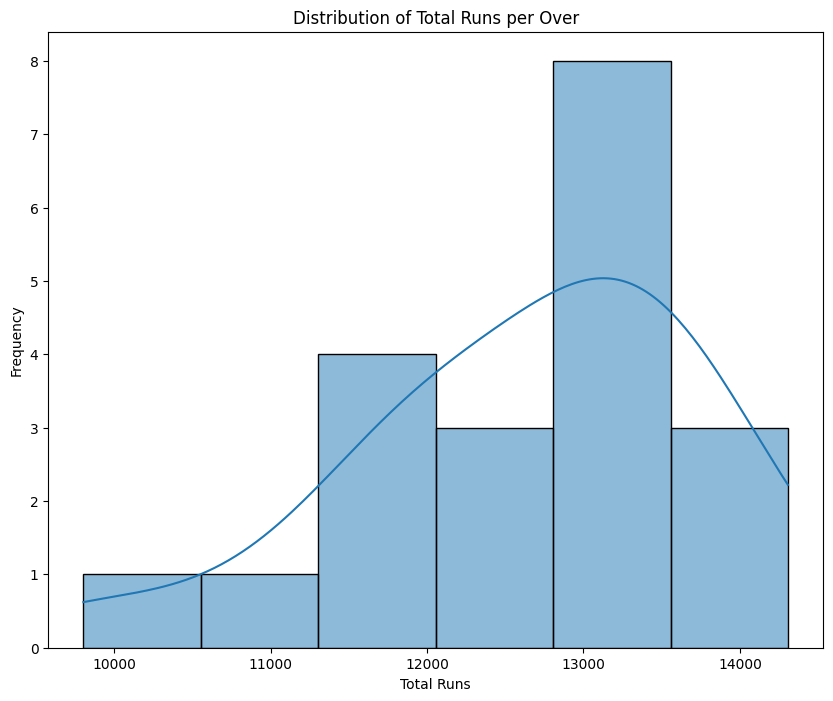

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculating total runs per over
total_runs_per_over = merged_data.groupby('over')['total_runs'].sum()

# Plotting the distribution
plt.figure(figsize=(10, 8))
sns.histplot(total_runs_per_over, kde=True)
plt.title('Distribution of Total Runs per Over')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()


In [16]:
# # Calculate mean and standard deviation for each numeric variable
# means_stds = merged_data[numeric_columns].agg(['mean', 'std'])

# # Plot histograms for each numeric variable
# for col in numeric_columns:
#     plt.figure(figsize=(6, 3))
#     sns.histplot(merged_data[col], kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.show()

# means_stds


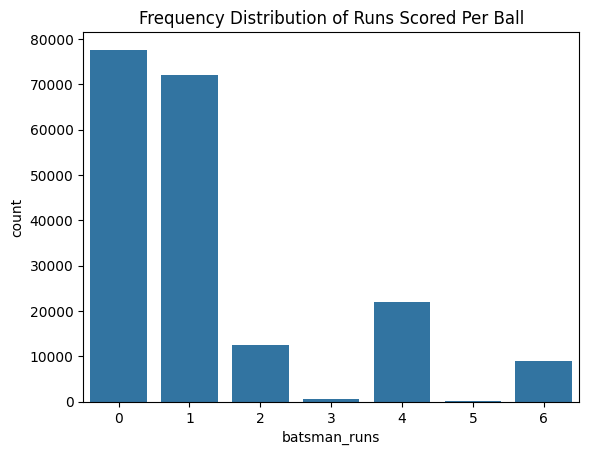

Proportion of deliveries resulting in wickets: 0.049077883681022186


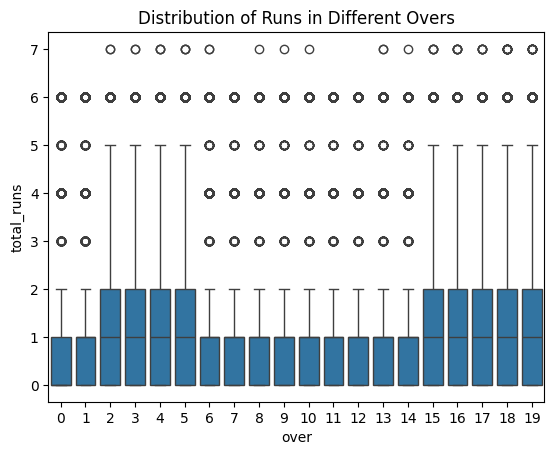

In [17]:
# Frequency distribution of runs scored per ball
sns.countplot(x='batsman_runs', data=merged_data)
plt.title('Frequency Distribution of Runs Scored Per Ball')
plt.show()

# Proportion of deliveries resulting in wickets
wicket_proportion = merged_data['is_wicket'].mean()
print(f"Proportion of deliveries resulting in wickets: {wicket_proportion}")

# Distribution of runs in different overs
sns.boxplot(x='over', y='total_runs', data=merged_data)
plt.title('Distribution of Runs in Different Overs')
plt.show()

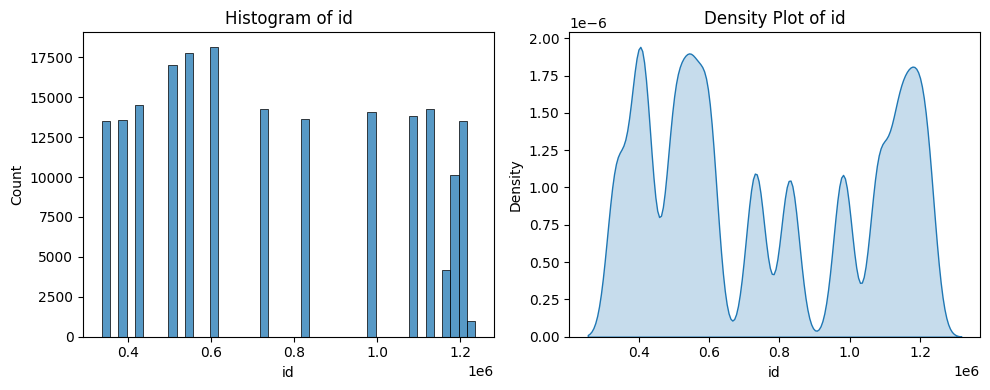

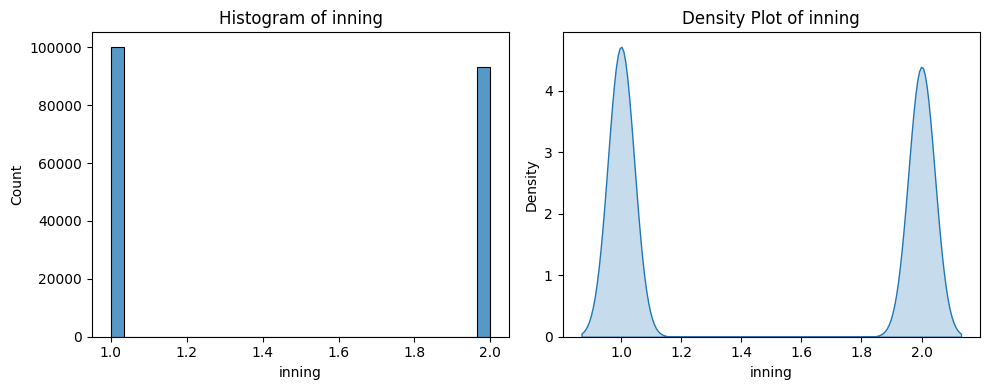

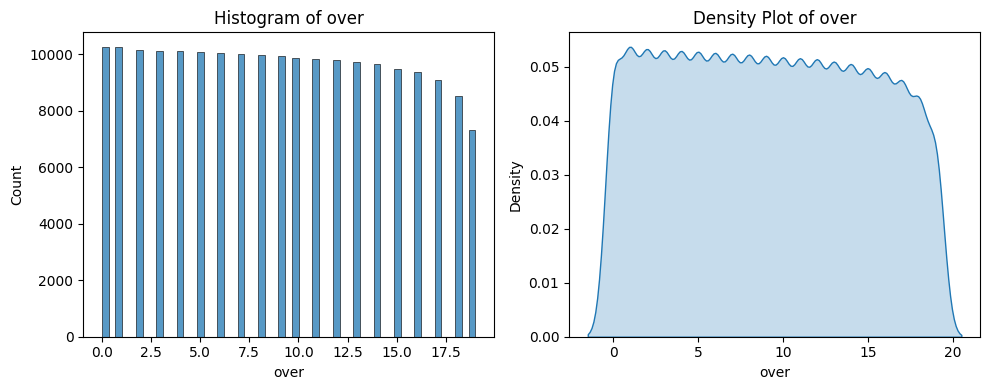

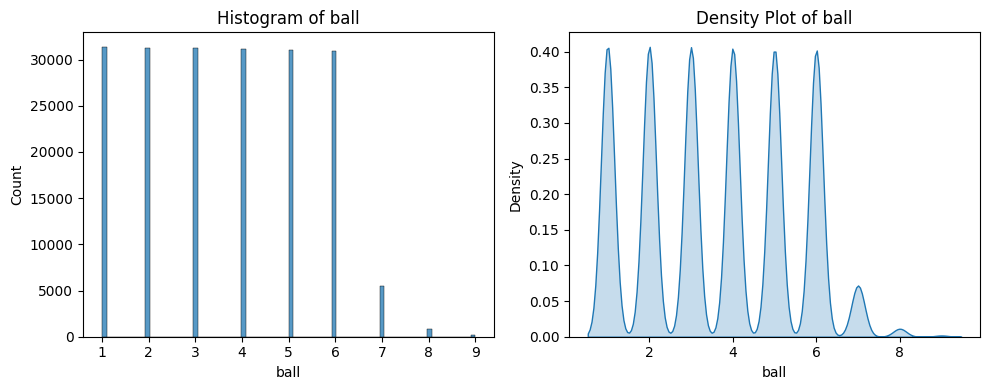

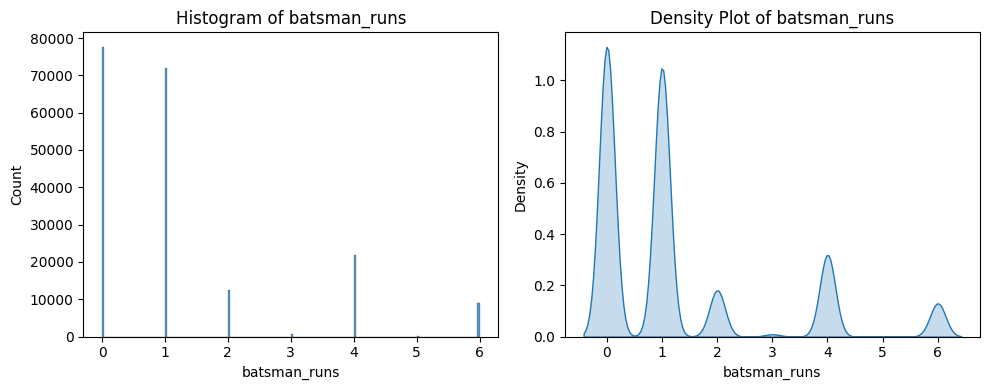

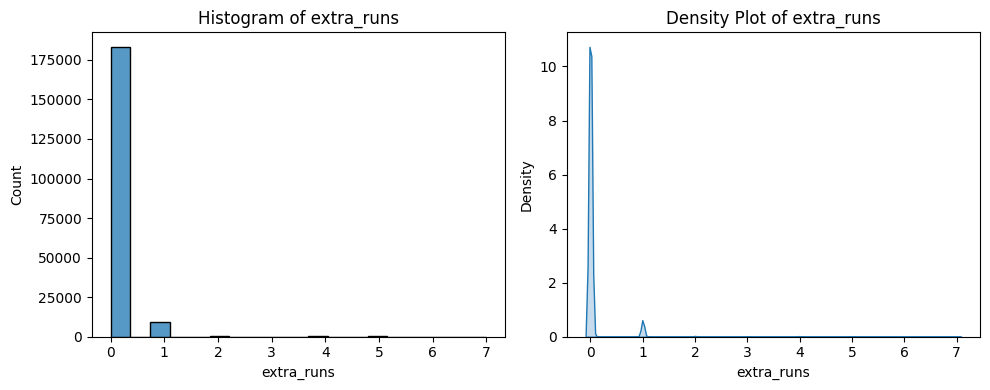

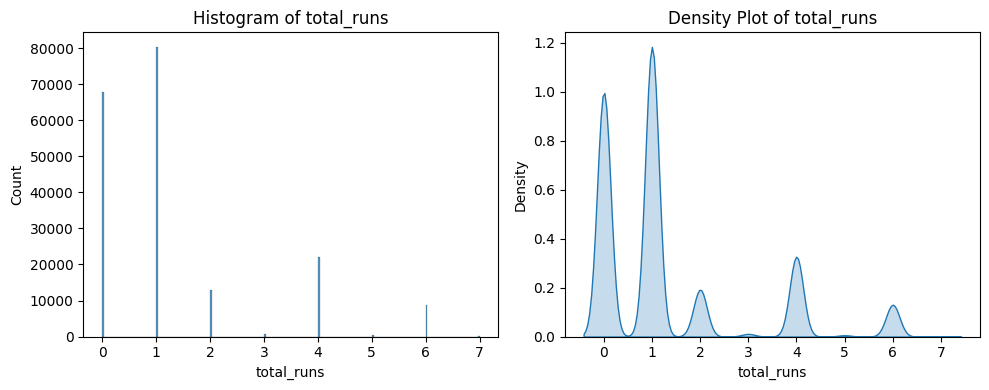

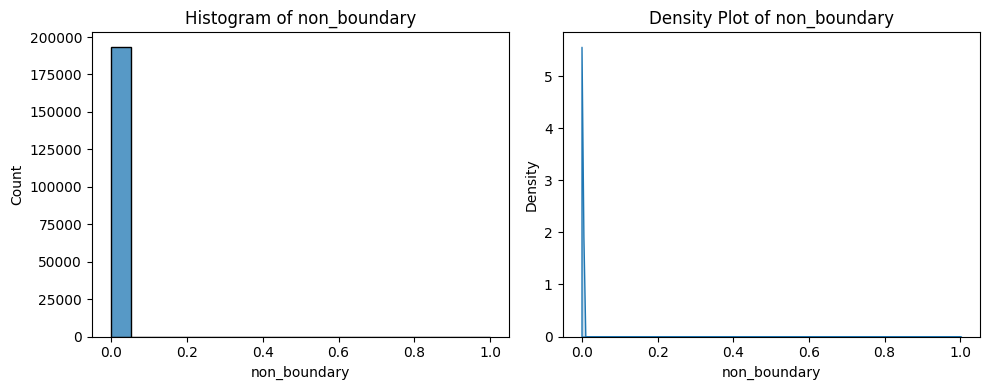

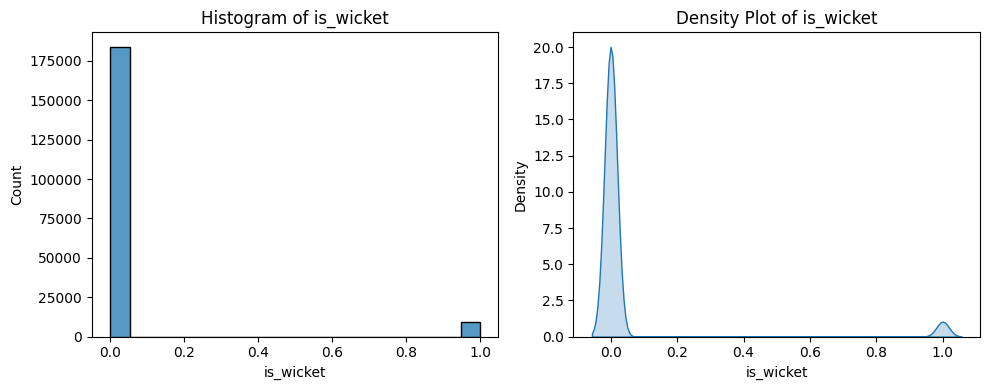

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms and density plots for each numeric variable
for col in numeric_columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(merged_data[col], kde=False)
    plt.title(f'Histogram of {col}')

    # Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(merged_data[col], fill=True)
    plt.title(f'Density Plot of {col}')

    plt.tight_layout()
    plt.show()


# Q3. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

To Predict Total Runs Scored I would need
- total_runs
- batsman_runs
- Over
- extra_runs
- ball
- inning
- id

In [25]:
# Calculate the correlation matrix
correlation_matrix = ipl_data.corr()

# Correlation with the target variable
target_correlation = correlation_matrix['total_runs']
print(target_correlation.sort_values(ascending=False))


total_runs      1.000000
batsman_runs    0.977587
over            0.087345
extra_runs      0.070707
id              0.024763
non_boundary    0.019587
ball            0.006693
inning         -0.007472
is_wicket      -0.180115
Name: total_runs, dtype: float64


<ipython-input-25-99206f2cc33f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ipl_data.corr()


In [31]:
from sklearn.ensemble import RandomForestRegressor
feature_columns = ['batting_average', 'bowling_economy', 'team_win_ratio', 'venue_score_average']
# Prepare your features (X) and target (y)
X = ipl_data['extra_runs']  # Replace with your actual feature columns
y = ipl_data['total_runs']     # Assuming 'total_runs' is your target variable

# Fit the model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 1. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Q4.Which independent variables have missing data? How much?

MISSING - batting_average', 'bowling_economy', 'team_win_ratio', 'venue_score_average' and so on which needs to be calculated.



# Q5.Do the training and test sets have the same data?

Yes

# In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.